In [1]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
X_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_train_con_escalado.csv', encoding = 'unicode_escape')
X_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_test_con_escalado.csv', encoding = 'unicode_escape')

y_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_train.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)
y_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_test.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)

In [5]:
len(X_train), len(X_test)

(38312, 16422)

In [6]:
import xgboost as xgb

In [7]:
xgb_clf = xgb.XGBClassifier()

In [8]:
xgb_clf.load_model('/home/pedro/TpIAFiuba/Modelos/XGBoost_Model_sinReduccion.json')

In [9]:
xgb_clf

XGBClassifier(alpha=7, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              feature_types=['float', 'int', 'int', 'int', 'float', 'float',
                             'int', 'int', 'int', 'int', 'int', 'int', 'int',
                             'int', 'int', 'int', 'int', 'int', 'int', 'int',
                             'int', '...
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [10]:
from joblib import load

In [11]:
rf_clf = load('/home/pedro/TpIAFiuba/Modelos/RF_Model_sinReduccion.joblib')

In [12]:
lgbm_clf = load('/home/pedro/TpIAFiuba/Modelos/LGBM_Model_sinReduccion.joblib')

In [13]:
rf_clf

RandomForestClassifier(min_samples_leaf=2, random_state=10)

In [14]:
lgbm_clf

LGBMClassifier(n_estimators=120, random_state=10)

In [15]:
from sklearn.ensemble import VotingClassifier

In [16]:
voting_clf = VotingClassifier(estimators=[('lgbm_clf', lgbm_clf), ('rf_clf', rf_clf), ('xgb_clf', xgb_clf)], voting='soft')

In [17]:
voting_clf

VotingClassifier(estimators=[('lgbm_clf',
                              LGBMClassifier(n_estimators=120,
                                             random_state=10)),
                             ('rf_clf',
                              RandomForestClassifier(min_samples_leaf=2,
                                                     random_state=10)),
                             ('xgb_clf',
                              XGBClassifier(alpha=7, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical...
                                            gamma=None, gpu_id=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, ...))],
                 voting='soft')

In [18]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lgbm_clf',
                              LGBMClassifier(n_estimators=120,
                                             random_state=10)),
                             ('rf_clf',
                              RandomForestClassifier(min_samples_leaf=2,
                                                     random_state=10)),
                             ('xgb_clf',
                              XGBClassifier(alpha=7, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical...
                                            gamma=None, gpu_id=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, ...))],
                 voting='soft')

In [19]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [20]:
preds = voting_clf.predict(X_test)

In [21]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      8211
           1       0.75      0.79      0.77      8211

    accuracy                           0.76     16422
   macro avg       0.76      0.76      0.76     16422
weighted avg       0.76      0.76      0.76     16422



In [22]:
recall_score(y_test, preds)

0.7919863597612958

In [23]:
accuracy_score(y_test, preds)

0.7629399585921325

In [24]:
cm = confusion_matrix(y_test, preds)

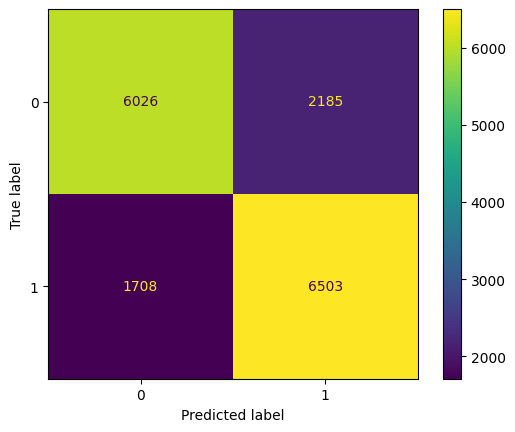

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot()